# Using Facebook's Prophet to forecast time series ( from Assignment 2)

In [1]:
%load_ext google.colab.data_table

In [2]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#%pip install pystan~=2.14

In [4]:

#%pip install fbprophet
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# fbprophet has been renamed to prophet!
# Import prophet
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, plot_components_plotly
# Import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [7]:
import yfinance as yf
import pandas as pd

In [8]:
#@title **Sector Time Series Components** { run: "auto" }
#@markdown 
#@markdown Parameters

sector_tsc = 'JBHT' #@param ['EMR', 'JBHT', 'LBRDA', 'MTSI']{type:"raw"}
start_date = '2017-12-01' #@param {type:"date"}
end_date = '2021-12-31' #@param {type:"date"}
#n_forecast_days = 10 #@param {type:"number"}

m = Prophet()

sector = yf.download(sector_tsc, start_date, end_date)['Adj Close']

dframe_3 = pd.DataFrame(sector)

dframe_3.to_csv('file_name.csv') # I had to create a csv file to get it to work.

dframe_4 = pd.read_csv('file_name.csv', parse_dates=['Date'])

dframe_tsc = dframe_4.rename(columns={"Date": "ds", "Adj Close": "y"})
# dframe_tsc
# Python
m = Prophet()
m.fit(dframe_tsc)


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkf5d21u/36nz9wdf.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwkf5d21u/a_wqnd1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89337', 'data', 'file=/tmp/tmpwkf5d21u/36nz9wdf.json', 'init=/tmp/tmpwkf5d21u/a_wqnd1_.json', 'output', 'file=/tmp/tmpwkf5d21u/prophet_modelxeql_46h/prophet_model-20230607201239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
sector_tsc

'JBHT'

In [10]:
# Python
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
1752,2023-12-26
1753,2023-12-27
1754,2023-12-28
1755,2023-12-29
1756,2023-12-30


In [11]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-12-01,107.398126,100.270493,114.523789
1,2017-12-04,106.974920,99.703464,113.783652
2,2017-12-05,107.053598,99.973766,113.960125
3,2017-12-06,106.766231,99.668268,114.223404
4,2017-12-07,106.761393,99.504176,113.964074
...,...,...,...,...
1752,2023-12-26,304.650753,129.854565,470.145881
1753,2023-12-27,304.844659,131.671871,469.859138
1754,2023-12-28,305.357395,129.155468,470.682265
1755,2023-12-29,305.977665,131.112352,473.357058


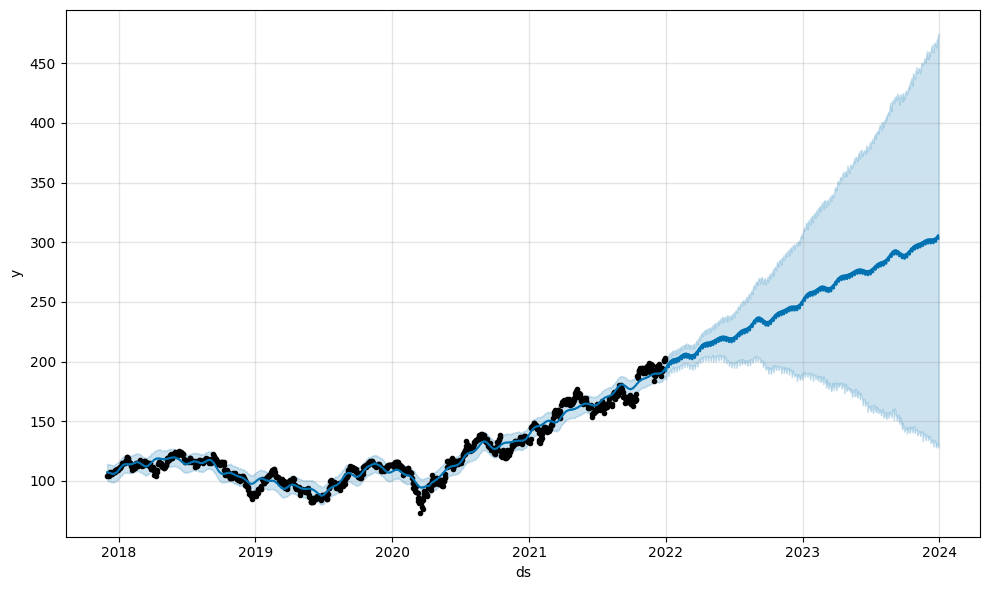

In [12]:
# Python
fig1 = m.plot(forecast)

In [13]:
forecast

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Export to CSV for Google Data Studio.  Will need to do 4 times for each stock.

In [14]:
csv_file_name = "file_name_" + sector_tsc + ".csv"

In [15]:
csv_file_name

'file_name_JBHT.csv'

In [16]:
forecast.to_csv(csv_file_name,index=True,index_label='Line_Number')

In [17]:
#forecast.to_csv('file_name_LBRDA.csv',index=True,index_label='Line_Number')

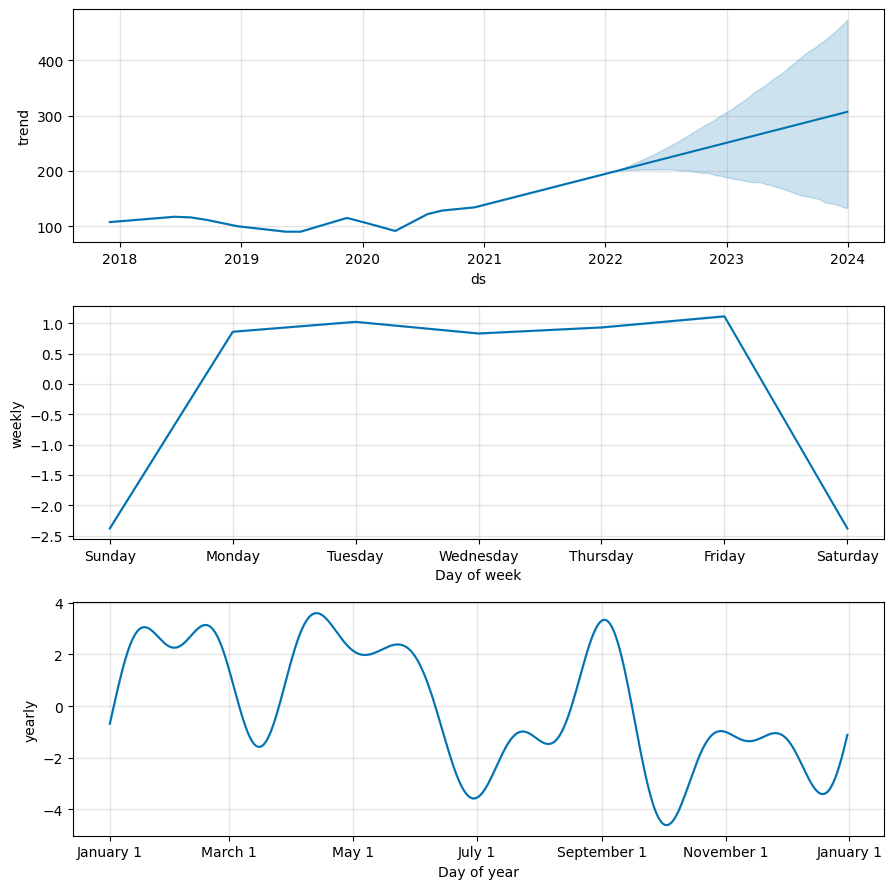

In [18]:
fig2 = m.plot_components(forecast, uncertainty=True)

In [20]:
forecast

Output hidden; open in https://colab.research.google.com to view.

# Code for comparing individual stocks versus their correpsonding sector - Last 2 years.

In [21]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [24]:
date_time_str = datetime.today().strftime('2021-12-31')  # 5/12/2021
todays_date = datetime.strptime(date_time_str,'%Y-%m-%d')
print (type(todays_date))
print (todays_date)

<class 'datetime.datetime'>
2021-12-31 00:00:00


In [25]:
epoch_year = todays_date.year
print (epoch_year)
beginning_of_year_date = f"{epoch_year}-1-1"
print (beginning_of_year_date)
#todays_date = datetime.today().strftime('%Y-%m-%d')
#print (todays_date)
# Setting today's date so data will be found.
month_ago_date =     (todays_date - relativedelta(months=1)).strftime('%Y-%m-%d')
year_ago_date =      (todays_date - relativedelta(years=1)).strftime('%Y-%m-%d')
two_years_ago_date = (todays_date - relativedelta(years=2)).strftime('%Y-%m-%d')
print (two_years_ago_date)

2021
2021-1-1
2019-12-31


In [26]:
# The following are the ticker symbols for S&P500 sectors:
sector_tickers = [ "XLI", #Industrials
             "XLC",  #Telecommunications
             "EMR", # Telcom Stock
             "JBHT", #Industrial Stock
             "LBRDA", #Telcom Stock
             "MTSI", #Industrial Stock
             ]

In [27]:
# Getting data for 2020 and 2021.
import yfinance as yf
sector_data = yf.download(sector_tickers, start=two_years_ago_date, end=todays_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [28]:
sector_data

,EMR,JBHT,LBRDA,MTSI,XLC,XLI
Date,,,,,,
2019-12-31,69.904503,113.336113,124.559998,26.600000,52.142719,77.131340
2020-01-02,71.022820,114.054291,125.190002,26.299999,52.755241,78.589340
2020-01-03,70.051163,113.578743,126.500000,26.080000,52.414951,78.437851
2020-01-06,70.628670,111.608620,126.930000,26.700001,53.114986,78.466255
2020-01-07,70.802826,114.180466,127.489998,26.580000,53.183048,78.305305
...,...,...,...,...,...,...
2021-12-23,88.105156,194.576431,157.509995,77.480003,77.158409,101.726494
2021-12-27,88.964203,200.406952,159.229996,79.940002,77.909149,102.803276
2021-12-28,89.659172,201.048172,160.729996,79.500000,77.869644,103.322098


In [29]:
# compute the daily log returns for all the sectors and stocks
daily_returns = sector_data.ffill().pct_change()
log_daily_returns = np.log(1+daily_returns)
log_daily_returns

,EMR,JBHT,LBRDA,MTSI,XLC,XLI
Date,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.015871,0.006317,0.005045,-0.011342,0.011679,0.018726
2020-01-03,-0.013775,-0.004178,0.010410,-0.008400,-0.006471,-0.001929
2020-01-06,0.008210,-0.017498,0.003393,0.023495,0.013267,0.000362
2020-01-07,0.002463,0.022782,0.004402,-0.004505,0.001281,-0.002053
...,...,...,...,...,...,...
2021-12-23,0.015567,0.012192,0.018324,0.005436,0.008873,0.011712
2021-12-27,0.009703,0.029525,0.010861,0.031257,0.009683,0.010529
2021-12-28,0.007781,0.003194,0.009376,-0.005519,-0.000507,0.005034


In [30]:
# example of finding data between data ranges using the PANDAS INDEX!!
log_daily_returns.loc[beginning_of_year_date:todays_date]

,EMR,JBHT,LBRDA,MTSI,XLC,XLI
Date,,,,,,
2021-01-04,-0.029804,-0.013334,-0.019480,0.003627,-0.014930,-0.024464
2021-01-05,0.017157,0.023672,-0.016309,0.022022,0.003604,0.009789
2021-01-06,0.033090,0.064643,-0.012176,0.003359,-0.004808,0.023557
2021-01-07,0.000488,0.007980,0.010530,0.028877,0.013166,0.005470
2021-01-08,-0.003051,0.005910,-0.001912,-0.003952,0.003116,-0.002452
...,...,...,...,...,...,...
2021-12-23,0.015567,0.012192,0.018324,0.005436,0.008873,0.011712
2021-12-27,0.009703,0.029525,0.010861,0.031257,0.009683,0.010529
2021-12-28,0.007781,0.003194,0.009376,-0.005519,-0.000507,0.005034


In [31]:
# log returs sum over time
# This is for computing the total return of a period as the sum of the period returns - for capstone were using last 2 years.
last_two_years_returns = log_daily_returns.loc[two_years_ago_date:todays_date].sum()
last_two_years_returns

EMR      0.246406
JBHT     0.572892
LBRDA    0.258974
MTSI     1.069238
XLC      0.400290
XLI      0.290540
dtype: float64

In [32]:
last_two_years_returns.to_csv("last_two_years_returns.csv",index_label='Symbol',index=True,header=['Returns'])

# Code for comparing individual stocks versus the overall market. - Last 2 years.

In [33]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [36]:
date_time_str = datetime.today().strftime('2021-12-31')  # 5/12/2021
todays_date = datetime.strptime(date_time_str,'%Y-%m-%d')
print (type(todays_date))
print (todays_date)

<class 'datetime.datetime'>
2021-12-31 00:00:00


In [37]:
epoch_year = todays_date.year
print (epoch_year)
beginning_of_year_date = f"{epoch_year}-1-1"
print (beginning_of_year_date)
#todays_date = datetime.today().strftime('%Y-%m-%d')
#print (todays_date)
# Setting today's date so data will be found.
month_ago_date =     (todays_date - relativedelta(months=1)).strftime('%Y-%m-%d')
year_ago_date =      (todays_date - relativedelta(years=1)).strftime('%Y-%m-%d')
two_years_ago_date = (todays_date - relativedelta(years=2)).strftime('%Y-%m-%d')
print (two_years_ago_date)

2021
2021-1-1
2019-12-31


In [38]:
# The following are the ticker symbols for S&P500 sectors:
sector_tickers = [ "SPY", #S&P 500 index
             "EMR", # Telcom Stock
             "JBHT", #Industrial Stock
             "LBRDA", #Telcom Stock
             "MTSI", #Industrial Stock
             ]

In [39]:
# Getting data for 2020 and 2021.
import yfinance as yf
sector_data = yf.download(sector_tickers, start=two_years_ago_date, end=todays_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [40]:
sector_data

,EMR,JBHT,LBRDA,MTSI,SPY
Date,,,,,
2019-12-31,69.904495,113.336113,124.559998,26.600000,305.658997
2020-01-02,71.022827,114.054291,125.190002,26.299999,308.517456
2020-01-03,70.051170,113.578751,126.500000,26.080000,306.181213
2020-01-06,70.628662,111.608612,126.930000,26.700001,307.349426
2020-01-07,70.802818,114.180473,127.489998,26.580000,306.485168
...,...,...,...,...,...
2021-12-23,88.105164,194.576447,157.509995,77.480003,461.326538
2021-12-27,88.964218,200.406937,159.229996,79.940002,467.855286
2021-12-28,89.659157,201.048203,160.729996,79.500000,467.472931


In [41]:
# compute the daily log returns for all the sectors and stocks
daily_returns = sector_data.ffill().pct_change()
log_daily_returns = np.log(1+daily_returns)
log_daily_returns

,EMR,JBHT,LBRDA,MTSI,SPY
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.015871,0.006317,0.005045,-0.011342,0.009308
2020-01-03,-0.013775,-0.004178,0.010410,-0.008400,-0.007601
2020-01-06,0.008210,-0.017498,0.003393,0.023495,0.003808
2020-01-07,0.002463,0.022782,0.004402,-0.004505,-0.002816
...,...,...,...,...,...
2021-12-23,0.015567,0.012192,0.018324,0.005436,0.006203
2021-12-27,0.009703,0.029525,0.010861,0.031257,0.014053
2021-12-28,0.007781,0.003195,0.009376,-0.005519,-0.000818


In [42]:
# example of finding data between data ranges using the PANDAS INDEX!!
log_daily_returns.loc[beginning_of_year_date:todays_date]

,EMR,JBHT,LBRDA,MTSI,SPY
Date,,,,,
2021-01-04,-0.029804,-0.013334,-0.019480,0.003627,-0.013707
2021-01-05,0.017157,0.023672,-0.016309,0.022022,0.006864
2021-01-06,0.033090,0.064643,-0.012176,0.003359,0.005961
2021-01-07,0.000488,0.007980,0.010530,0.028877,0.014748
2021-01-08,-0.003051,0.005910,-0.001912,-0.003952,0.005682
...,...,...,...,...,...
2021-12-23,0.015567,0.012192,0.018324,0.005436,0.006203
2021-12-27,0.009703,0.029525,0.010861,0.031257,0.014053
2021-12-28,0.007781,0.003195,0.009376,-0.005519,-0.000818


In [43]:
# log returs sum over time
# This is for computing the total return of a period as the sum of the period returns - for capstone were using last 2 years.
last_two_years_returns_with_spy = log_daily_returns.loc[two_years_ago_date:todays_date].sum()
last_two_years_returns_with_spy

EMR      0.246406
JBHT     0.572892
LBRDA    0.258974
MTSI     1.069238
SPY      0.423381
dtype: float64

In [44]:
last_two_years_returns_with_spy.to_csv("last_two_years_returns_with_spy.csv",index_label='Symbol',index=True,header=['Returns'])